<h1>Técnicas Avanzadas de Aprendizaje Automático para la Detección de Intrusos en Sistemas Ciber-Físicos: Análisis y Preprocesamiento de los datos</h1>

<h2>Introducción</h2>

En esta libreta se explican las siguientes fases de la metología **CRISP-DM**:

- **Comprensión de los datos**: Se recolectan los datos, se describen y se realiza un análisis exploratorio de estos.
- **Preparación de los datos**: Se realizan las transformaciones necearias a los datos para poder ser utilizados en el modelo.




Los contenidos que se tratarán en esta libreta son los siguientes:

1. **Recolección de los datos**. Pertenece a la fase de Comprensión de los datos.
2. **División de los datos**. Pertenece a la fase de Comprensión de los datos.
3. **Análisis exploratorio de los datos**. Pertenece a la fase de Comprensión de los datos.
4. **Preprocesamiento**. Pertenece a la fase de Preparación de los datos.
5. **Exportar resultados**. Se guardan los resultados obtenidos.

Se han seguido los pasos que se establecen en el artículo: **MADICS: A Methodology for Anomaly Detectionin Industrial Control Systems**, aunque tenía algunos fallos a nivel académico y han sido eliminados y solucionados.

<h2>1. Recolección de los datos</h2>

Se importa la librería necesaria para cargar los datos:

In [1]:
import pandas as pd

In [2]:
ruta = "SWaT_Dataset_Normal.xlsx"

data_normal = pd.read_excel(ruta, engine='openpyxl')

c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
ruta = "SWaT_Dataset_Attack_v0.xlsx"

data_attack = pd.read_excel(ruta, engine='openpyxl')

c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Así mismo, se corrigen los errores de formato que presentan los datos ya cargados:

In [4]:
#renombrar las columnas ya que no se han cargado bien
data_normal.columns = [ 'Timestamp',	'FIT101',	'LIT101',	'MV101',	'P101',	'P102',	'AIT201',	'AIT202',	'AIT203',	'FIT201',	'MV201',	'P201',	'P202',	'P203',	'P204',	'P205',	'P206',	'DPIT301',	'FIT301',	'LIT301',	'MV301',	'MV302',	'MV303',	'MV304',	'P301',	'P302',	'AIT401',	'AIT402',	'FIT401',	'LIT401',	'P401',	'P402',	'P403',	'P404',	'UV401',	'AIT501',	'AIT502',	'AIT503',	'AIT504',	'FIT501',	'FIT502',	'FIT503',	'FIT504',	'P501',	'P502',	'PIT501',	'PIT502',	'PIT503',	'FIT601',	'P601',	'P602',	'P603',	'Normal/Attack']
data_attack.columns = [ 'Timestamp',	'FIT101',	'LIT101',	'MV101',	'P101',	'P102',	'AIT201',	'AIT202',	'AIT203',	'FIT201',	'MV201',	'P201',	'P202',	'P203',	'P204',	'P205',	'P206',	'DPIT301',	'FIT301',	'LIT301',	'MV301',	'MV302',	'MV303',	'MV304',	'P301',	'P302',	'AIT401',	'AIT402',	'FIT401',	'LIT401',	'P401',	'P402',	'P403',	'P404',	'UV401',	'AIT501',	'AIT502',	'AIT503',	'AIT504',	'FIT501',	'FIT502',	'FIT503',	'FIT504',	'P501',	'P502',	'PIT501',	'PIT502',	'PIT503',	'FIT601',	'P601',	'P602',	'P603',	'Normal/Attack']

In [5]:
#borrar la primera fila del dataset ya que se ha copiado mal y vuelven a aparecer el nombre de las variables:
data_normal= data_normal.drop(0, axis=0).reset_index(drop=True)
data_attack= data_attack.drop(0, axis=0).reset_index(drop=True)

In [6]:
#mostrar como se han cargado los datos para normal
data_normal.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,22/12/2015 4:30:00 PM,0,124.3135,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256,1,1,1,Normal
1,22/12/2015 4:30:01 PM,0,124.392,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256,1,1,1,Normal
2,22/12/2015 4:30:02 PM,0,124.4705,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256,1,1,1,Normal
3,22/12/2015 4:30:03 PM,0,124.6668,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256,1,1,1,Normal
4,22/12/2015 4:30:04 PM,0,124.5098,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256,1,1,1,Normal


In [7]:
#mostrar como se han cargado los datos para attack
data_attack.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.886,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:03 AM,2.53435,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,28/12/2015 10:00:04 AM,2.56926,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


In [8]:
#observar que la variable clase no está en valor numérico, las pasamos para mayor comodidad:
print("En data_normal: ",data_normal["Normal/Attack"].unique())
print("En data attack: ",data_attack["Normal/Attack"].unique())

En data_normal:  ['Normal']
En data attack:  ['Normal' 'Attack' 'A ttack']


En el archivo de ataques aparece en la variable clase formatos incorrectos, se corrigen también:

In [9]:
data_normal['Normal/Attack'] = data_normal['Normal/Attack'].apply(lambda x: 0 if x == 'Normal' else 1)
data_attack['Normal/Attack'] = data_attack['Normal/Attack'].apply(lambda x: 0 if x == 'Normal' else 1)

In [10]:
#mostrar como se han cargado los datos para attack
data_normal.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,22/12/2015 4:30:00 PM,0,124.3135,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256,1,1,1,0
1,22/12/2015 4:30:01 PM,0,124.392,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256,1,1,1,0
2,22/12/2015 4:30:02 PM,0,124.4705,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256,1,1,1,0
3,22/12/2015 4:30:03 PM,0,124.6668,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256,1,1,1,0
4,22/12/2015 4:30:04 PM,0,124.5098,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256,1,1,1,0


Se muestra el tipo de los datos:

In [11]:
print("data_normal:\n", data_normal.dtypes)
print("data_attack:\n", data_attack.dtypes)

data_normal:
 Timestamp        object
FIT101           object
LIT101           object
MV101            object
P101             object
P102             object
AIT201           object
AIT202           object
AIT203           object
FIT201           object
MV201            object
P201             object
P202             object
P203             object
P204             object
P205             object
P206             object
DPIT301          object
FIT301           object
LIT301           object
MV301            object
MV302            object
MV303            object
MV304            object
P301             object
P302             object
AIT401           object
AIT402           object
FIT401           object
LIT401           object
P401             object
P402             object
P403             object
P404             object
UV401            object
AIT501           object
AIT502           object
AIT503           object
AIT504           object
FIT501           object
FIT502           object
FI

También se corrige el formato de los datos:

In [12]:
#convertir todas las columnas que deberían ser numéricas, exceptuando "Timestamp" que debería ser datetime
for columna in data_normal.select_dtypes(include=['object']).columns:
    if columna == "Timestamp":
        continue
    data_normal[columna] = pd.to_numeric(data_normal[columna], errors='coerce') #pasa la variable a tipo numeric

#hacer lo mismo con el conjunto de datos attack:
for columna in data_attack.select_dtypes(include=['object']).columns:

    if columna == "Timestamp":
        continue
    data_attack[columna] = pd.to_numeric(data_attack[columna], errors='coerce')


#convertir la columna Timestamp a formato fecha, tanto en normal como attack:
data_normal['Timestamp'] = data_normal['Timestamp'].str.strip()
data_normal['Timestamp'] = pd.to_datetime(
    data_normal['Timestamp'], 
    format='%d/%m/%Y %I:%M:%S %p',
    errors='coerce' #para gestionar errores
)

data_attack['Timestamp'] = pd.to_datetime(data_attack['Timestamp'])

C:\Users\Óscar\AppData\Local\Temp\ipykernel_6028\2504852891.py:23: UserWarning: Parsing dates in  %d/%m/%Y %I:%M:%S %p format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_attack['Timestamp'] = pd.to_datetime(data_attack['Timestamp'])


<h2>2. División de los datos</h2>

El conjunto de datos SWaT presenta los siguientes archivos:

- <b>SWaT_Dataset_Normal_v0</b>: Archivo que contiene media hora más de preparación del sistema.

- <b>SWaT_Dataset_Normal</b>: Archivo anterior recortado: se elimina la primera media hora de preparación del sistema. Se usa este archivo como <u>train</u> y <u>validation</u> para que el modelo aprenda el comportamiento de datos normales.

- <b>SWaT_Dataset_Attack_v0</b>: Archivo que contiene los registros con ataques. Será el conjunto de <u>test</u>.

Para dividir los datos de validación y train,  se cogerá el primer 80% de los datos como train (para respetar el orden temporal) y el 20% restante final se usará como validación.

In [13]:
#variables predictoras del data_normal (X_train)
X_train_completo = data_normal.drop(columns = 'Normal/Attack')
#variable clase del data_normal (y_train)
y_train_completo = data_normal['Normal/Attack']

In [14]:
#indice de la división -> 80%
split_index = int(len(X_train_completo) * 0.8)
#para las variables predictoras
X_train = X_train_completo.iloc[:split_index]
X_val = X_train_completo.iloc[split_index:]
#para la variable clase
y_train = y_train_completo.iloc[:split_index]
y_val = y_train_completo.iloc[split_index:]

Se divide de igual manera el test:

In [15]:
#variables predictoras del data_attack (X_test)
X_test = data_attack.drop(columns = 'Normal/Attack')
#variable clase del data_attack (y_test)
y_test = data_attack['Normal/Attack']

<h2>3. Análisis exploratorio de los datos</h2>

A continuación, se muestran todos los valores de los sensores en función del tiempo para conocer sus valores y sus distribuciones.

Se importa la librería necesaria para graficar los sensores:

In [16]:
import matplotlib.pyplot as plt

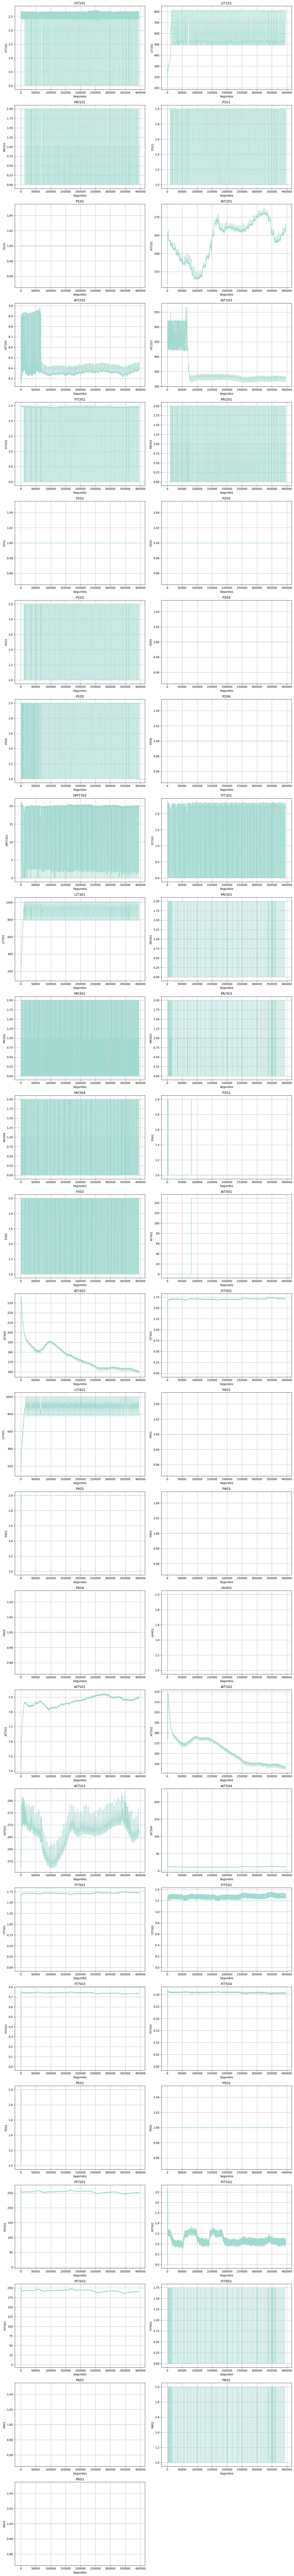

In [17]:
variables_predictoras = ['FIT101',	'LIT101',	'MV101',	'P101',	'P102',	'AIT201',	'AIT202',	'AIT203',	'FIT201',	'MV201',
                        'P201',	'P202',	'P203',	'P204',	'P205',	'P206',	'DPIT301',	'FIT301',	'LIT301',	'MV301',	'MV302',
                        'MV303',	'MV304',	'P301',	'P302',	'AIT401',	'AIT402',	'FIT401',	'LIT401',	'P401',	'P402',	'P403',
                        'P404',	'UV401',	'AIT501',	'AIT502',	'AIT503',	'AIT504',	'FIT501',	'FIT502',	'FIT503',	'FIT504',
                        'P501',	'P502',	'PIT501',	'PIT502',	'PIT503',	'FIT601',	'P601',	'P602',	'P603']

filas = -(-len(variables_predictoras) // 2)  #numero de columnas = 3
fig, axes = plt.subplots(filas, 2, figsize=(15, 5 * filas))
axes = axes.flatten()

#pasar fechas a segundos
X_train_aux = pd.DataFrame()
X_train_aux['Seconds'] = (X_train['Timestamp'] - X_train['Timestamp'].iloc[0]).dt.total_seconds()


#graficar las variables predictoras
for i, variable in enumerate(variables_predictoras):
    axes[i].plot(X_train_aux['Seconds'], X_train[variable], label=variable, color='#a2d9ce')
    axes[i].set_title(variable)
    axes[i].set_xlabel('Segundos')
    axes[i].set_ylabel(variable)
    axes[i].grid(True)

#quitar gráficos vacíos
for j in range(len(variables_predictoras), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

En un primer analáisis, se puede observar que hay ciertas variables que no cambian de valor (P601, P603, P502, P102, P201, P202, P204, P206, P401, P403 y P404). También se aprecia cierta estacionalidad.

También se observa que se da un tiempo de puesta en marcha del sistema. Para que el modelo sólo aprenda los valores normales de los sensores, se quita el tiempo en que tarda en estabilizarse, que queda definido por el tiempo máximo de los sensores <b>AIT202</b> y <b>AIT401</b> (unos 100000 segundos):

In [18]:
#eliminar los primeros 100,000 registros
X_train_modified = X_train.iloc[100000:]
y_train_modified = y_train.iloc[100000:]

<h3>3.1. Comprobación de valores faltantes</h3>

También se comprueba si existen valores faltantes en las variables:

In [19]:
X_train.isnull().sum()

Timestamp    0
FIT101       0
LIT101       0
MV101        0
P101         0
P102         0
AIT201       0
AIT202       0
AIT203       0
FIT201       0
MV201        0
P201         0
P202         0
P203         0
P204         0
P205         0
P206         0
DPIT301      0
FIT301       0
LIT301       0
MV301        0
MV302        0
MV303        0
MV304        0
P301         0
P302         0
AIT401       0
AIT402       0
FIT401       0
LIT401       0
P401         0
P402         0
P403         0
P404         0
UV401        0
AIT501       0
AIT502       0
AIT503       0
AIT504       0
FIT501       0
FIT502       0
FIT503       0
FIT504       0
P501         0
P502         0
PIT501       0
PIT502       0
PIT503       0
FIT601       0
P601         0
P602         0
P603         0
dtype: int64

En este problema en concreto, parece que no existen valores faltantes. En el caso de que los hubiese, existen varias formas de imputar los valores nulos:

- Imputar por la media o por la mediana.
- Eliminar los ejemplos dañados.
- Marcar los datos faltantes como valores no válidos.

Aunque estas técnicas suelen demostrar buenos resultados de manera general, en un problema de ICS (Industrial Control System), las dos primeras opciones no tienen mucho sentido debido a las siguientes razones:

- Muchas de las variables son categóricas (por ejemplo, un 0 para válvula cerrada y un 1 para válvula abierta), por lo que imputar por la media no tiene sentido en este caso.
- La ausencia de valores faltantes puede ser un patrón de ataque, por lo que no conviene eliminarlos.

Tras esta explicación, se elige imputar con la tercera opción: marcar los datos faltantes como valores no válidos. Aunque este dataset no presente este tipo de valores, se añade una columna que se llamará <b>Valid</b>, en la que un 1 representará que el registro no presenta valores faltantes y 0 en caso contrario.

In [20]:
X_train_modified['Valid'] = X_train.notna().all(axis=1).astype(int)
X_val['Valid'] = X_val.notna().all(axis = 1).astype(int)
X_test['Valid'] = X_test.notna().all(axis=1).astype(int)
#hacer describe de Valid para ver la varianza, por si hay no validos
X_train_modified[['Valid']].describe()


C:\Users\Óscar\AppData\Local\Temp\ipykernel_6028\3094619646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_modified['Valid'] = X_train.notna().all(axis=1).astype(int)
C:\Users\Óscar\AppData\Local\Temp\ipykernel_6028\3094619646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['Valid'] = X_val.notna().all(axis = 1).astype(int)


,Valid
count,296000.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


<h3>3.2. Comprobación de tipos de las variables</h3>

En este paso, se preparan las características categóricas para que poder aplicar nuestros modelos de ML. Para codificar las variables categóricas, lo más recomendando es aplicar One-Hot Encoding (<b>OHE</b>), convirtiendo valores categóricos en características binarias.

Para comprobar si el dataset presenta variables categóricas, se analizan los valores únicos de cada variable:

In [21]:
for col in X_train_modified.columns:
    unique_values = X_train_modified[col].nunique()
    print(f"Columna {col} tiene {unique_values} valores únicos.")

Columna Timestamp tiene 296000 valores únicos.
Columna FIT101 tiene 2157 valores únicos.
Columna LIT101 tiene 6704 valores únicos.
Columna MV101 tiene 3 valores únicos.
Columna P101 tiene 2 valores únicos.
Columna P102 tiene 1 valores únicos.
Columna AIT201 tiene 463 valores únicos.
Columna AIT202 tiene 354 valores únicos.
Columna AIT203 tiene 948 valores únicos.
Columna FIT201 tiene 1972 valores únicos.
Columna MV201 tiene 3 valores únicos.
Columna P201 tiene 1 valores únicos.
Columna P202 tiene 1 valores únicos.
Columna P203 tiene 2 valores únicos.
Columna P204 tiene 1 valores únicos.
Columna P205 tiene 2 valores únicos.
Columna P206 tiene 1 valores únicos.
Columna DPIT301 tiene 3973 valores únicos.
Columna FIT301 tiene 4367 valores únicos.
Columna LIT301 tiene 4554 valores únicos.
Columna MV301 tiene 3 valores únicos.
Columna MV302 tiene 3 valores únicos.
Columna MV303 tiene 3 valores únicos.
Columna MV304 tiene 3 valores únicos.
Columna P301 tiene 1 valores únicos.
Columna P302 tie

Se considerarán categóricas las variables que tengan menos de 10 valores únicos:

In [22]:
#identificar columnas categóricas
categorical_columns = [col for col in variables_predictoras if X_train_modified[col].nunique() <= 10]
print("Columnas categóricas:", categorical_columns)

Columnas categóricas: ['MV101', 'P101', 'P102', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'P401', 'P402', 'P403', 'P404', 'UV401', 'P501', 'P502', 'P601', 'P602', 'P603']


Posteriormente,  se aplicará la codificación **One-Hot Encoding**.

<h2>4. Preprocesamiento</h2>

En esta sección se estudian las diferentes características del dataset para ver si son importantes. Además, se extraerán características de mayor nivel que aportarán información de mayor calidad a los datos.

In [23]:
import seaborn as sns
import numpy as np

<h3>4.1. Selección de variables</h3>

Ahora es momento de observar si ciertas variables predictoras no cambian en todo el dataset para eliminarlas. Anteriormente, se había concluido que algunas variables sólo tenían un valor único. Se observa aquellas variables que no cambian de valor comprobando si tienen <b>varianza = 0</b>:

In [24]:
columnas_sin_timestamp = [col for col in X_train_modified.columns if col != 'Timestamp']
#varianza de cada variable
varianzas = X_train_modified[columnas_sin_timestamp].var()

variables_con_varianza_cero = [col for col, varianza in varianzas.items() if varianza == 0]
variables_con_varianza_cero

['P102',
 'P201',
 'P202',
 'P204',
 'P206',
 'P301',
 'P401',
 'P402',
 'P403',
 'P404',
 'UV401',
 'P501',
 'P502',
 'P601',
 'P603',
 'Valid']

Se quitan estas variables del dataset:

In [25]:
X_train_modified = X_train_modified.drop(columns=variables_con_varianza_cero)

**Nota**: Como se sabe que cada fila corresponde a un segundo, se quita la columna Timestamp porque según el orden de las variables se respeta el orden temporal del dataset:

In [26]:
X_train_modified = X_train_modified.drop('Timestamp', axis=1)

Se realiza lo mismo con los datos de validación y test:

In [27]:
X_val_modified = X_val.drop(columns=variables_con_varianza_cero)
X_test_modified = X_test.drop(columns=variables_con_varianza_cero)
X_val_modified = X_val_modified.drop('Timestamp', axis=1)
X_test_modified = X_test_modified.drop('Timestamp', axis=1)

En pruebas preliminares se ha visto que las siguientes variables no aportan información, y por lo tanto, se prescindirá de ellas.

In [28]:
var_sin_info = ['AIT201', 'AIT202', 'AIT203', 'FIT301', 'AIT401', 'AIT402', 'FIT401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'PIT501', 'PIT502', 'PIT503']

In [29]:
#quitamos las variables sin información
X_train_modified = X_train_modified.drop(columns=var_sin_info)
X_val_modified = X_val_modified.drop(columns=var_sin_info)
X_test_modified = X_test_modified.drop(columns=var_sin_info)

<h3>4.2. Extracción de variables</h3>

La extracción de características es un proceso que consiste en usar conocimiento experto para extrar características más importantes del dataset original. En esta subsección se muestran las tareas que se deben realizar para conseguirlas.


En este caso, se ha decidido calcular para cada variable la desviación estándar de la ventana de 120 segundos anterior. Es decir, para cada variable, se generará una variable llamada `std_var` que contiene la desviación estándar del vector formado por las 120 filas anteriores a fila que se está calculado, evitando así la fuga de datos.


Generar la desviación estándar de una ventana temporal pasada en un problema de detección de anomalías es bueno porque:

- Permite conocer cómo varía el valor de un sensor en el tiempo. Una desviación alta puede indicar una actividad errática y una desviación baja puede significar estancamiento. 
- Permite detectar cambios estaciones y analizar la estabilidad o inestabilidad.

Esta generación de variables tiene sentido aplicarlo en variables contínuas. Se separan por lo tanto en datasets las variables contínuas de las categóricas:


In [30]:
#calcular las variables categóricas una vez hemos modificado X_train:
categorical_columns_modified = [col for col in X_train_modified.columns if X_train_modified[col].nunique() <= 5]
print("Columnas categóricas:", categorical_columns_modified)

Columnas categóricas: ['MV101', 'P101', 'MV201', 'P203', 'P205', 'MV301', 'MV302', 'MV303', 'MV304', 'P302', 'P602']


In [31]:
data_cleaned_train = X_train_modified.drop(categorical_columns_modified, axis=1)
data_cleaned_val = X_val_modified.drop(categorical_columns_modified, axis=1)
data_cleaned_test = X_test_modified.drop(categorical_columns_modified, axis=1)

In [32]:
def genera_variables(data):
    """
    genera_variables: Función que genera variables con la desviación estándar de una ventana
    temporal para todas las variables de un dataframe pasado como parámetro.
    Por defecto la ventana es de 120 segundos para adecuarse al modelo.

    Parámetros:
    data: Dataframe del que se quieren generar las variables, es un dataframe.

    Devuelve:
    Dataframe con las variables nuevas generadas.

    """
    for column in data.columns:
        
        std_col = f"std_{column}_120"  #nombre de la nueva variable

        #desviación estándar en una ventana de 120
        std_120 = data[column].rolling(window=120).std()

        #asigna la nueva variable al DataFrame
        data[std_col] = std_120

    return data

Se crean las nuevas variables con las desviaciones estándar llamando a la función anterior:

In [33]:
full_dataset_train = genera_variables(data_cleaned_train)

full_dataset_train.head(123)

,FIT101,LIT101,FIT201,DPIT301,LIT301,LIT401,FIT601,std_FIT101_120,std_LIT101_120,std_FIT201_120,std_DPIT301_120,std_LIT301_120,std_LIT401_120,std_FIT601_120
100000,2.454280,534.3478,2.439625,19.870030,972.8275,994.7834,0.000064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,2.437946,533.9553,2.440778,19.850820,973.1479,995.2064,0.000064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,2.427057,534.1123,2.440778,19.822010,973.9891,995.0141,0.000064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,2.425776,533.8768,2.440778,19.822010,974.2294,994.9756,0.000064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,2.428338,533.6412,2.440778,19.834820,974.4697,995.1679,0.000064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100118,2.655735,536.0356,2.440521,2.324092,1000.0240,990.0538,0.000064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100119,2.632354,536.0356,2.440906,2.324092,1000.3440,989.9769,0.000064,0.080366,1.066439,0.001725,8.516043,7.756000,3.060734,0.0
100120,2.624347,535.9179,2.440906,2.324092,1000.2240,989.4771,0.000064,0.080247,1.077074,0.001712,8.529854,7.929016,3.144743,0.0
100121,2.618582,535.9964,2.416173,2.324092,1000.2640,989.0925,0.000064,0.079882,1.088036,0.002943,8.541273,8.095300,3.237778,0.0


Se observa que la primera ventana de tiempo (primera ventana de 120) tiene Not a Number (NaN). Como la primera ventana de tiempo no tiene una anterior con la que compararse, se le asigna que tiene varianza cero.

In [34]:
full_dataset_train = full_dataset_train.fillna(0)
full_dataset_train.head(123)

,FIT101,LIT101,FIT201,DPIT301,LIT301,LIT401,FIT601,std_FIT101_120,std_LIT101_120,std_FIT201_120,std_DPIT301_120,std_LIT301_120,std_LIT401_120,std_FIT601_120
100000,2.454280,534.3478,2.439625,19.870030,972.8275,994.7834,0.000064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
100001,2.437946,533.9553,2.440778,19.850820,973.1479,995.2064,0.000064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
100002,2.427057,534.1123,2.440778,19.822010,973.9891,995.0141,0.000064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
100003,2.425776,533.8768,2.440778,19.822010,974.2294,994.9756,0.000064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
100004,2.428338,533.6412,2.440778,19.834820,974.4697,995.1679,0.000064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100118,2.655735,536.0356,2.440521,2.324092,1000.0240,990.0538,0.000064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
100119,2.632354,536.0356,2.440906,2.324092,1000.3440,989.9769,0.000064,0.080366,1.066439,0.001725,8.516043,7.756000,3.060734,0.0
100120,2.624347,535.9179,2.440906,2.324092,1000.2240,989.4771,0.000064,0.080247,1.077074,0.001712,8.529854,7.929016,3.144743,0.0
100121,2.618582,535.9964,2.416173,2.324092,1000.2640,989.0925,0.000064,0.079882,1.088036,0.002943,8.541273,8.095300,3.237778,0.0


Se sigue el mismo procedimiento para validación y test:

In [35]:
full_dataset_val = genera_variables(data_cleaned_val)

full_dataset_val.head(123)

,FIT101,LIT101,FIT201,DPIT301,LIT301,LIT401,FIT601,std_FIT101_120,std_LIT101_120,std_FIT201_120,std_DPIT301_120,std_LIT301_120,std_LIT401_120,std_FIT601_120
396000,0.0,715.7740,2.461923,19.85402,799.2742,829.8257,0.000064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396001,0.0,714.9105,2.461282,19.90204,798.9138,830.0948,0.000064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396002,0.0,714.1647,2.461282,19.90845,799.1541,829.8641,0.000064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396003,0.0,713.7329,2.461282,19.90845,799.1541,830.2102,0.000064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396004,0.0,713.1833,2.461282,19.95006,799.3544,830.2102,0.000064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396118,0.0,657.4837,2.455259,19.94686,806.5640,839.0925,0.000064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396119,0.0,657.0912,2.455259,19.94686,806.8044,839.1310,0.000064,0.0,16.625907,0.002883,0.065481,2.107926,2.645374,0.0
396120,0.0,656.6201,2.455259,20.00448,807.2049,839.1310,0.000064,0.0,16.648831,0.002869,0.065338,2.145766,2.609028,0.0
396121,0.0,656.2276,2.455259,20.00768,807.1248,839.0925,0.000064,0.0,16.675594,0.002860,0.065570,2.175151,2.574542,0.0


In [36]:
full_dataset_val = full_dataset_val.fillna(0)
full_dataset_val.head(123)

,FIT101,LIT101,FIT201,DPIT301,LIT301,LIT401,FIT601,std_FIT101_120,std_LIT101_120,std_FIT201_120,std_DPIT301_120,std_LIT301_120,std_LIT401_120,std_FIT601_120
396000,0.0,715.7740,2.461923,19.85402,799.2742,829.8257,0.000064,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
396001,0.0,714.9105,2.461282,19.90204,798.9138,830.0948,0.000064,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
396002,0.0,714.1647,2.461282,19.90845,799.1541,829.8641,0.000064,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
396003,0.0,713.7329,2.461282,19.90845,799.1541,830.2102,0.000064,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
396004,0.0,713.1833,2.461282,19.95006,799.3544,830.2102,0.000064,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396118,0.0,657.4837,2.455259,19.94686,806.5640,839.0925,0.000064,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
396119,0.0,657.0912,2.455259,19.94686,806.8044,839.1310,0.000064,0.0,16.625907,0.002883,0.065481,2.107926,2.645374,0.0
396120,0.0,656.6201,2.455259,20.00448,807.2049,839.1310,0.000064,0.0,16.648831,0.002869,0.065338,2.145766,2.609028,0.0
396121,0.0,656.2276,2.455259,20.00768,807.1248,839.0925,0.000064,0.0,16.675594,0.002860,0.065570,2.175151,2.574542,0.0


In [37]:
full_dataset_test = genera_variables(data_cleaned_test)

full_dataset_test.head(123)

,FIT101,LIT101,FIT201,DPIT301,LIT301,LIT401,FIT601,std_FIT101_120,std_LIT101_120,std_FIT201_120,std_DPIT301_120,std_LIT301_120,std_LIT401_120,std_FIT601_120
0,2.427057,522.8467,2.445391,19.74838,956.1651,942.0662,0.000128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.446274,522.8860,2.445391,19.74838,956.1651,942.0277,0.000128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.489191,522.8467,2.442316,19.69076,956.4855,941.8739,0.000128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.534350,522.9645,2.442316,19.69076,956.8060,941.7970,0.000128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.569260,523.4748,2.443085,19.69076,957.0864,942.2200,0.000128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2.608013,523.4748,2.440137,19.65555,960.6111,953.9861,0.000128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,2.586875,523.5533,2.440137,19.65555,961.0116,954.1015,0.000128,0.078766,1.383947,0.001944,0.054532,1.113892,3.204404,0.0
120,2.574064,523.8281,2.440137,19.63954,960.8113,954.3707,0.000128,0.077987,1.375476,0.001914,0.054050,1.087968,3.215491,0.0
121,2.560292,523.7496,2.440137,19.62033,960.8113,955.0628,0.000128,0.077397,1.367834,0.001883,0.053650,1.059984,3.234694,0.0


In [38]:
full_dataset_test = full_dataset_test.fillna(0)
full_dataset_test.head(123)

,FIT101,LIT101,FIT201,DPIT301,LIT301,LIT401,FIT601,std_FIT101_120,std_LIT101_120,std_FIT201_120,std_DPIT301_120,std_LIT301_120,std_LIT401_120,std_FIT601_120
0,2.427057,522.8467,2.445391,19.74838,956.1651,942.0662,0.000128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,2.446274,522.8860,2.445391,19.74838,956.1651,942.0277,0.000128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,2.489191,522.8467,2.442316,19.69076,956.4855,941.8739,0.000128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,2.534350,522.9645,2.442316,19.69076,956.8060,941.7970,0.000128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,2.569260,523.4748,2.443085,19.69076,957.0864,942.2200,0.000128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2.608013,523.4748,2.440137,19.65555,960.6111,953.9861,0.000128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
119,2.586875,523.5533,2.440137,19.65555,961.0116,954.1015,0.000128,0.078766,1.383947,0.001944,0.054532,1.113892,3.204404,0.0
120,2.574064,523.8281,2.440137,19.63954,960.8113,954.3707,0.000128,0.077987,1.375476,0.001914,0.054050,1.087968,3.215491,0.0
121,2.560292,523.7496,2.440137,19.62033,960.8113,955.0628,0.000128,0.077397,1.367834,0.001883,0.053650,1.059984,3.234694,0.0


A continuación se une el dataset anterior con el dataset correspondiente a las variables categóricas:

In [39]:
numerical_columns_modified = [col for col in X_train_modified.columns if X_train_modified[col].nunique() > 5]
print("Columnas contínuas:", numerical_columns_modified)
data_cat_train = X_train_modified.drop(numerical_columns_modified, axis=1)
data_cat_val = X_val_modified.drop(numerical_columns_modified, axis=1)
data_cat_test = X_test_modified.drop(numerical_columns_modified, axis=1)
#reiniciar indíces en el test para no tener problemas al unirlos
data_cat_test= data_cat_test.reset_index(drop=True)

Columnas contínuas: ['FIT101', 'LIT101', 'FIT201', 'DPIT301', 'LIT301', 'LIT401', 'FIT601']


In [40]:
#unir train y validation
full_dataset_train_mod = pd.concat ([data_cat_train, full_dataset_train], axis = 1)
full_dataset_val_mod = pd.concat ([data_cat_val, full_dataset_val], axis = 1)
full_dataset_test_mod = pd.concat ([data_cat_test, full_dataset_test], axis = 1)

<h3>4.3. Codificación de características</h3>

Antes de pasar con el siguiente paso es momento de escalar los datos (tanto contínuos como categóricos) por convencia. 

Para las columnas categóricas se aplicará **One-Hot Enconding**, y sobre las variables contínuas se existen varias opciones:

- <b>MinMaxScaler</b>: Calcula el mínimo y máximo por columna. Este escalador no distorsiona la forma del dataset.
- <b>StandardScaler</b>: Se transforman los datos para que tengan media 0 y una desviación estándar 1.

En este trabajo se escalarán con ***MinMaxScaler**.

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()

In [44]:
#calcular de nuevo las variables numéricas (para obtener las características extraídas)
numerical_columns_modified = [col for col in full_dataset_train.columns if full_dataset_train[col].nunique() > 5]

In [45]:
preprocesamiento = ColumnTransformer(
    transformers = [
        ("continuas", scaler, numerical_columns_modified),
        ("categoricas", OneHotEncoder(handle_unknown = "ignore"), categorical_columns_modified)
        ]
)

Realizar el fit con los datos de train para evitar fuga de datos al escalar:

In [46]:
preprocesamiento.fit_transform(full_dataset_train_mod)

array([[0.89406111, 0.14525337, 0.98063156, ..., 1.        , 1.        ,
        0.        ],
       [0.88811085, 0.14406383, 0.98109502, ..., 1.        , 1.        ,
        0.        ],
       [0.88414414, 0.14453965, 0.98109502, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.6998575 , 0.98964591, ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.69854885, 0.98974882, ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.69688349, 0.98974882, ..., 1.        , 1.        ,
        0.        ]])

Ahora, para pasar a dataset el resultado obtenido, se debe obtener el nombre de las columnas categóricas ya que han cambiado de nombre al aplicar One-Hot-Encoding:

In [47]:
X_train_transformed = preprocesamiento.transform(full_dataset_train_mod)
X_val_transformed = preprocesamiento.transform(full_dataset_val_mod)
X_test_transformed = preprocesamiento.transform(full_dataset_test_mod)

In [48]:
#extraer el OneHotEncoder del ColumnTransformer
ohe = preprocesamiento.named_transformers_['categoricas']
#guardar en una variable los nombres de las nuevas columnas
ohe_feature_names = ohe.get_feature_names_out(categorical_columns_modified)
ohe_feature_names

array(['MV101_0', 'MV101_1', 'MV101_2', 'P101_1', 'P101_2', 'MV201_0',
       'MV201_1', 'MV201_2', 'P203_1', 'P203_2', 'P205_1', 'P205_2',
       'MV301_0', 'MV301_1', 'MV301_2', 'MV302_0', 'MV302_1', 'MV302_2',
       'MV303_0', 'MV303_1', 'MV303_2', 'MV304_0', 'MV304_1', 'MV304_2',
       'P302_1', 'P302_2', 'P602_1', 'P602_2'], dtype=object)

Ahora toca transformar los datos normalizados y codificados a un dataframe:

In [49]:
final_cols = list(numerical_columns_modified) + list(ohe_feature_names)

df_train_final = pd.DataFrame(X_train_transformed, columns=final_cols)
df_val_final = pd.DataFrame(X_val_transformed, columns=final_cols)
df_test_final = pd.DataFrame(X_test_transformed, columns=final_cols)

<h2>5. Exportar resultados</h2>

Una vez se han seleccionado las mejores variables y se han generado nuevas características de mayor nivel, hay que exportar los datos para poder entrenar el modelo.

Se añaden y_train a x_train para que quede todo junto (igual con y_val e y_test):

In [50]:
#modificar el índice para ajustarlo al actual
y_train_modified.reset_index(drop=True, inplace=True)
print(y_train_modified)

#hacer igual con validation y test
y_val.reset_index(drop=True, inplace=True)
print(y_val)

y_test.reset_index(drop=True, inplace=True)
print(y_test)


0         0
1         0
2         0
3         0
4         0
         ..
295995    0
295996    0
295997    0
295998    0
295999    0
Name: Normal/Attack, Length: 296000, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
98995    0
98996    0
98997    0
98998    0
98999    0
Name: Normal/Attack, Length: 99000, dtype: int64
0         0
1         0
2         0
3         0
4         0
         ..
449914    0
449915    0
449916    0
449917    0
449918    0
Name: Normal/Attack, Length: 449919, dtype: int64


Se juntan los datos con la variable clase:

In [51]:
df_train_fin = pd.concat ([df_train_final, y_train_modified], axis = 1)
df_val_fin = pd.concat ([df_val_final, y_val], axis = 1)
df_test_fin = pd.concat ([df_test_final, y_test], axis = 1)

Finalmente, se exportan los dataframe finales como csv:

In [52]:
df_train_fin.to_csv("train.csv", index=False)
df_val_fin.to_csv("val.csv", index=False)
df_test_fin.to_csv("test.csv", index=False)